Total Income: ₹1.00

--- Deductions ---
Standard deduction: ₹0.75
Company EPF deduction: ₹0.05

--- Tax Breakdown ---

--- Summary ---
Total Deductions: ₹0.80
Net Income After Deductions: ₹0.20
Total Tax: ₹0.00
Net Income after Deductions: ₹1
Employee EPF deduction: ₹0.05, monthly 0.00
Company EPF deduction: ₹0.05, monthly 0.00
ESPP: ₹0.14, monthly 0.01
Effective Tax Rate: 0.00%
Monthly pay is : 0.06343333333333333
Total Income: ₹1.00

--- Deductions ---
Standard deduction: ₹0.75
Company EPF deduction: ₹0.05

--- Tax Breakdown ---

--- Summary ---
Total Deductions: ₹0.80
Net Income After Deductions: ₹0.20
Total Tax: ₹0.00
Net Income after Deductions: ₹1
Employee EPF deduction: ₹0.05, monthly 0.00
Company EPF deduction: ₹0.05, monthly 0.00
ESPP: ₹0.14, monthly 0.01
Effective Tax Rate: 0.00%
Monthly pay is : 0.06343333333333333
Total Income: ₹2.00

--- Deductions ---
Standard deduction: ₹0.75
Company EPF deduction: ₹0.10

--- Tax Breakdown ---

--- Summary ---
Total Deductions: ₹0.85
Net

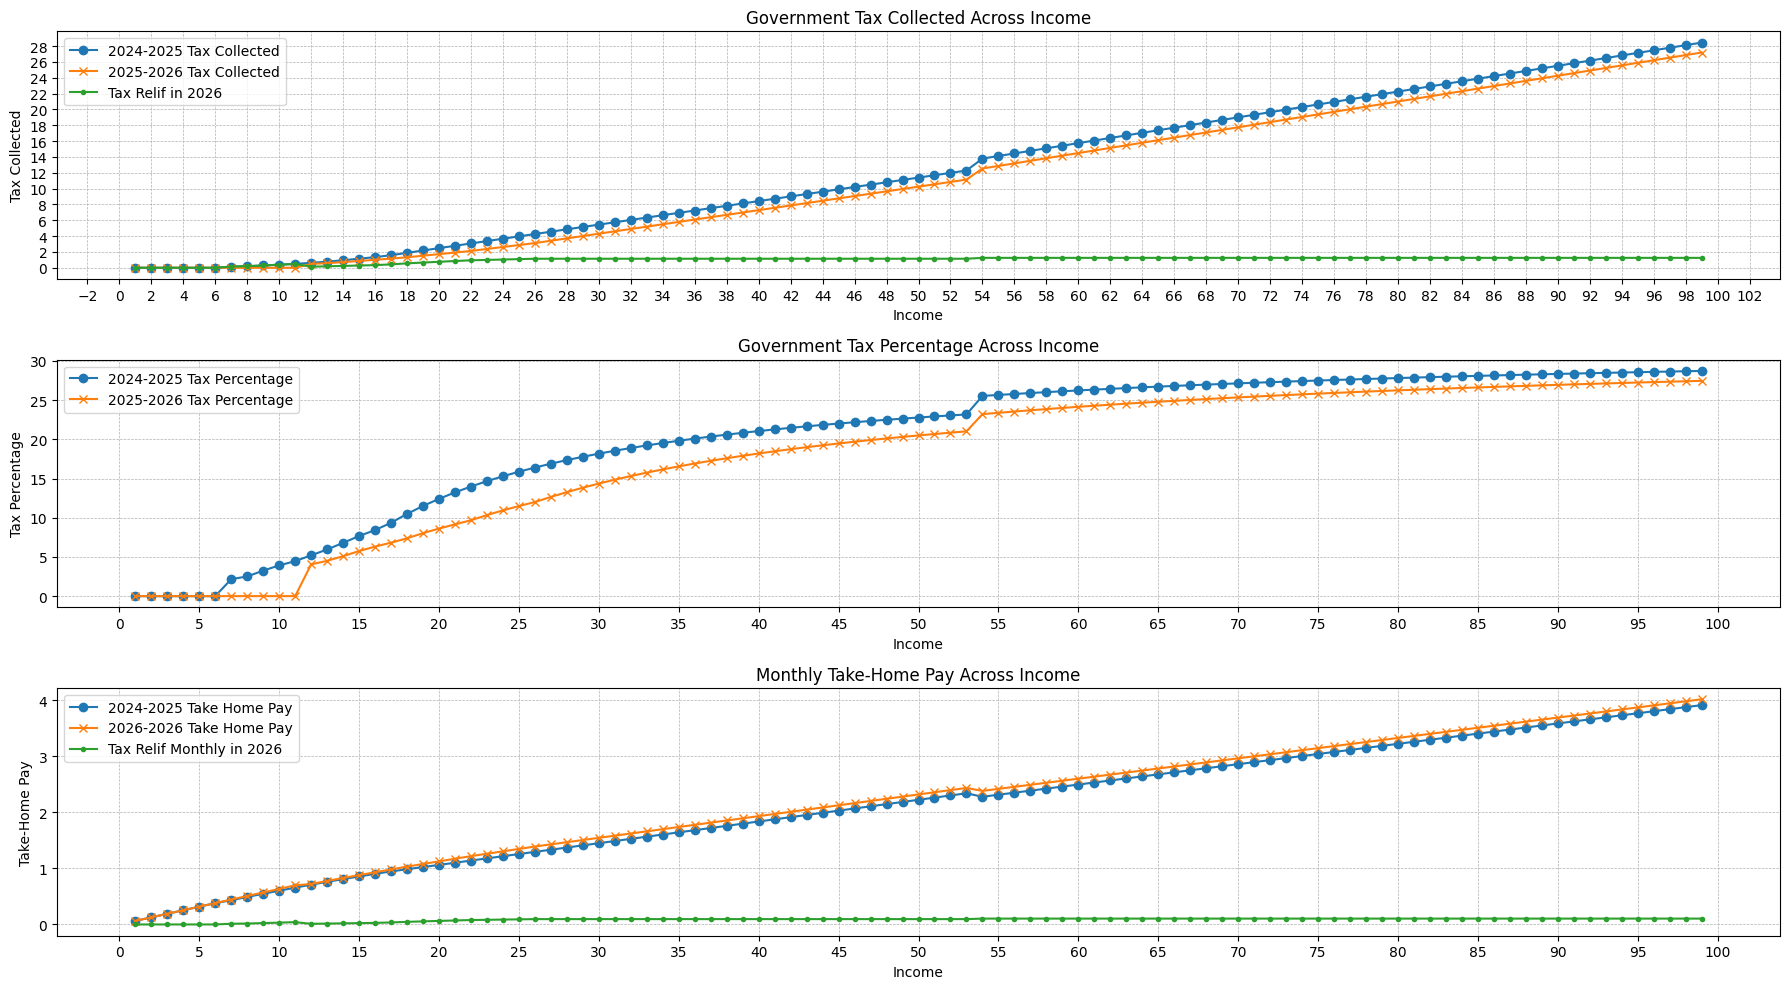

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tax_calculator
import math


income_levels = range(1, 100)
tax_cals = []
tax_collected_2025 = []
take_home_2025 = []
tax_percentage_2025 = []

tax_collected_2026 = []
take_home_2026 = []
tax_percentage_2026 = []
tax_saved = []
tax_saved_monthly = []



for income in income_levels:
    old_tax_cal = tax_calculator.TaxCalculator(income=income, slab=tax_calculator.TAX_SLABS, min=7)
    old_tax_cal.add_common_deductions()
    new_tax_cal = tax_calculator.TaxCalculator(income=income, slab=tax_calculator.TAX_SLAB_2025_2026, min = 12)
    new_tax_cal.add_common_deductions()

    old_tax_summary = old_tax_cal.pretty_print()
    new_tax_summary = new_tax_cal.pretty_print()
    
    tax_collected_2025.append(old_tax_summary['total_tax'])
    tax_collected_2026.append(new_tax_summary['total_tax'])

    take_home_2025.append(old_tax_summary['monthly_pay'])
    take_home_2026.append(new_tax_summary['monthly_pay'])

    tax_percentage_2025.append(old_tax_summary['tax_percentage'])
    tax_percentage_2026.append(new_tax_summary['tax_percentage'])
    relief = tax_collected_2025[-1] - tax_collected_2026[-1]
    if relief < 0:
        relief = 0
    tax_saved.append(relief)
    tax_saved_monthly.append(tax_saved[-1]/12)

# 1. Plotting Gov Tax Collected vs Income
plt.figure(figsize=(18, 10))

plt.subplot(3, 1, 1)
plt.plot(income_levels, tax_collected_2025, label='2024-2025 Tax Collected', marker='o')
plt.plot(income_levels, tax_collected_2026, label='2025-2026 Tax Collected', marker='x')
plt.plot(income_levels, tax_saved, label='Tax Relif in 2026', marker='.')
plt.title('Government Tax Collected Across Income')
plt.xlabel('Income')
plt.ylabel('Tax Collected')
plt.legend()

# Add gridlines (vertical and horizontal) every 5 units
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))


# 2. Plotting Gov Tax Percentage vs Income
plt.subplot(3, 1, 2)
plt.plot(income_levels, tax_percentage_2025, label='2024-2025 Tax Percentage', marker='o')
plt.plot(income_levels, tax_percentage_2026, label='2025-2026 Tax Percentage', marker='x')
plt.title('Government Tax Percentage Across Income')
plt.xlabel('Income')
plt.ylabel('Tax Percentage')
plt.legend()

# Add gridlines (vertical and horizontal) every 5 units
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))

# 3. Plotting Monthly Take-Home Pay vs Income
plt.subplot(3, 1, 3)
plt.plot(income_levels, take_home_2025, label='2024-2025 Take Home Pay', marker='o')
plt.plot(income_levels, take_home_2026, label='2026-2026 Take Home Pay', marker='x')
plt.plot(income_levels, tax_saved_monthly, label='Tax Relif Monthly in 2026', marker='.')
plt.title('Monthly Take-Home Pay Across Income')
plt.xlabel('Income')
plt.ylabel('Take-Home Pay')
plt.legend()

# Add gridlines (vertical and horizontal) every 5 units
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# Show all the plots
plt.tight_layout()
plt.show()
